# **Análise Exploratória de Preço de Combustíveis no Brasil** 
Dataset de preços de combustíveis - 2019/2

(em desenvolvimento)

Fonte: dados.gov.br

In [ ]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [ ]:
#importar dados
dataset = pd.read_csv("sample_data/ca-2019-02.csv", sep=";")
#visulizar
dataset.head()

In [ ]:
#escolhi somente as colunas que me interessavam
df = dataset.loc[:,['Regiao - Sigla','Estado - Sigla','Produto','Data da Coleta','Valor de Venda']]
df

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda
0,S,RS,GASOLINA,01/07/2019,"4,259"
1,S,RS,ETANOL,01/07/2019,"4,099"
2,S,RS,GNV,01/07/2019,"3,449"
3,NE,BA,GASOLINA,01/07/2019,"4,69"
4,NE,BA,ETANOL,01/07/2019,"3,49"
...,...,...,...,...,...
244926,CO,GO,ETANOL,23/09/2019,"2,899"
244927,CO,GO,DIESEL,23/09/2019,"3,699"
244928,CO,GO,DIESEL S10,23/09/2019,"3,799"
244929,NE,BA,GASOLINA,26/09/2019,"4,46"


In [ ]:
df.isnull().sum()

Regiao - Sigla    0
Estado - Sigla    0
Produto           0
Data da Coleta    0
Valor de Venda    0
dtype: int64

In [ ]:
#visualizar qual linha contém valor NaN
df.loc[df['Produto'].isnull()]

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda


In [ ]:
# apagar o registro com valor NaN
df.drop([df.index[244930]], inplace=True)

In [ ]:
# conferindo se registro foi apagado
df.loc[df['Produto'].isnull()]

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda


In [ ]:
##### exibir somente RJ  #####################
rj = df.loc[(df['Estado - Sigla']=='RJ')]

In [ ]:
rj.head()

,Regiao - Sigla,Estado - Sigla,Produto,Data da Coleta,Valor de Venda
4109,SE,RJ,GASOLINA,01/07/2019,5.099
4110,SE,RJ,ETANOL,01/07/2019,3.999
4111,SE,RJ,DIESEL S10,01/07/2019,3.999
4112,SE,RJ,GASOLINA,01/07/2019,5.089
4113,SE,RJ,ETANOL,01/07/2019,4.097


In [ ]:
rj.info()

In [ ]:
rj['Valor de Venda'].describe()

count    19201.000000
mean         3.969626
std          0.601717
min          2.699000
25%          3.499000
50%          3.799000
75%          4.599000
max          5.859000
Name: Valor de Venda, dtype: float64

In [ ]:
#O Describe() anterior não exibiu a estatística. Pode ser porque a coluna era do tipo Object
#converti a coluna Valor de Venda para float, substituindo a vírgula por ponto. Usar o astype direto não deu certo por causa da vírgula.

#df['Valor de Venda'] = df['Valor de Venda'].str.replace(',','.').astype("float")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Valor de Venda')

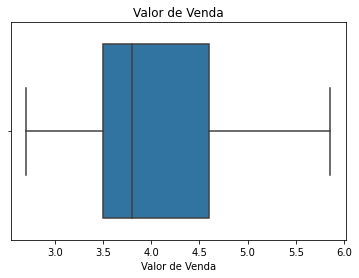

In [ ]:
srn.boxplot(rj['Valor de Venda']).set_title('Valor de Venda')

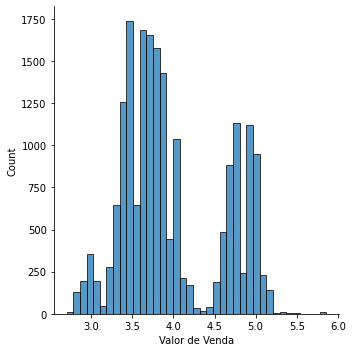

In [ ]:
srn.displot(rj['Valor de Venda'])

1) O eixo Y (count) representa a frequência com o que o valor aparece no dataframe?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


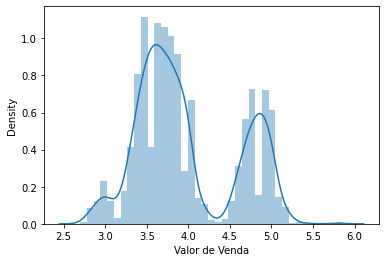

In [ ]:
srn.distplot(rj['Valor de Venda'])

In [ ]:
combustivel = rj.groupby(['Produto']).size()
combustivel

Produto
DIESEL        2716
DIESEL S10    4238
ETANOL        5348
GASOLINA      5435
GNV           1464
dtype: int64

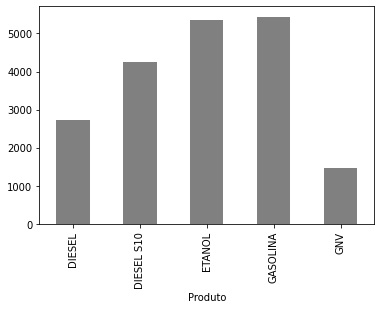

In [ ]:
combustivel.plot.bar(color = 'gray')

# Qual estado teve mais aumento?

# Série Temporal do valor do combustível

In [ ]:
# Transformar coluna "Data da Coleta" em datetime
rj['Data da Coleta'] = pd.to_datetime(rj['Data da Coleta'])

In [ ]:
# Transformar a coluna Data em index para poder fazer a série temporal
rj.set_index('Data da Coleta',inplace=True)

In [ ]:
rj.info()

In [ ]:
#reduzindo o dataframe para exibir apenas produto e preço
rj= rj.loc[:,['Produto','Valor de Venda']]
rj

In [ ]:
# transformando os combustíveis em colunas
rjj = rj
serierj = rjj.pivot_table(
    values="Valor de Venda", 
    index="Data da Coleta", 
    columns="Produto",
)
#serierj

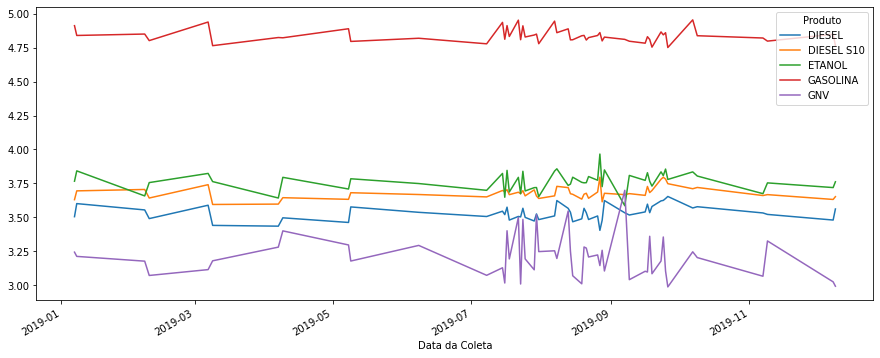

In [ ]:
# plotando a série temporal por combustível
serierj.plot(figsize=(15,6))